In [136]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from hmmlearn import hmm
%matplotlib inline
sns.set()

In [135]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 5.0 MB/s 


In [13]:
def open_file(file):
  with open(file, 'r') as f:
      text = f.read().lower()
  text = re.sub('[^а-я ]','', text)
  return text

In [22]:
tom_1 = open_file('tom_1.txt')
tom_2 = open_file('tom_2.txt')
tom_3 = open_file('tom_3.txt')
tom_4 = open_file('tom_4.txt')
text = tom_1 + tom_2 + tom_3 + tom_4

In [24]:
len(text) == len(tom_1) + len(tom_2) + len(tom_3) + len(tom_4)

True

In [91]:
RUSSIAN = ' '
for i in range(ord('а'), ord('я') + 1):
  if chr(i) == 'ж':
    RUSSIAN += 'ё'
  RUSSIAN += chr(i)
RUSSIAN, len(RUSSIAN)

(' абвгдеёжзийклмнопрстуфхцчшщъыьэюя', 34)

In [92]:
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [94]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
probabilities.shape

(34, 34)

In [95]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [96]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

<ipython-input-96-dc1e1f362eff>:1: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [99]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

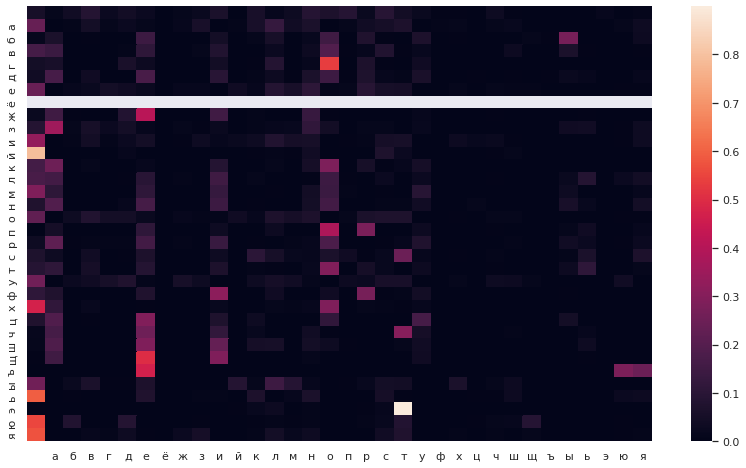

In [100]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

# Видимо буквы ё нету в тексте ... 

Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [108]:
proba_res = 0
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
  for s in RUSSIAN:
    if c != ' ' and s != ' ':
      proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[s]] * probabilities[POS[s], end] * probabilities[end, POS[' ']]
      if proba > 0:
          proba_res += proba
proba_res

2.7428579660193674e-05

Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [130]:
count = 0
while count < 8:
  s = []
  start = 'б'
  s.append(start)
  length = 7
  for i in range(length):
      index = POS[s[i]]
      while True:
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
        if next_char != ' ':
          break
      s.append(next_char)
  count += 1
  print (''.join(s))

быйилизо
божачегн
баныейне
буюдивиз
бракущиз
братьниж
бовпоена
блчаточа


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [139]:
female_births = pd.read_csv("daily-total-female-births-in-cal.csv",  index_col='Date')['Count']
female_births

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Count, Length: 365, dtype: int64

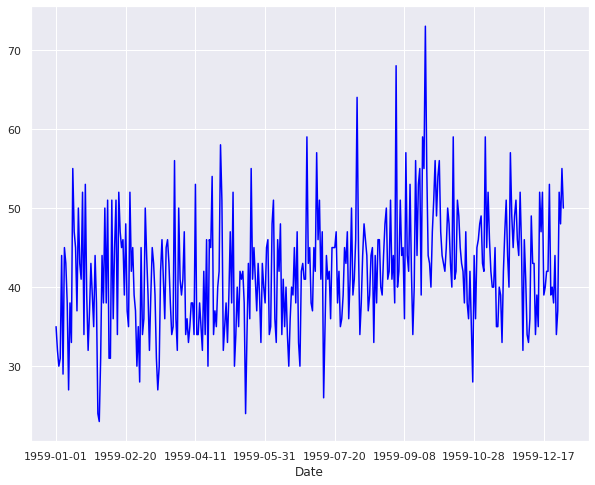

In [143]:
plt.figure(figsize=(10, 8))
female_births.plot(color='blue');

In [146]:
values = female_births.values.reshape(-1,1)

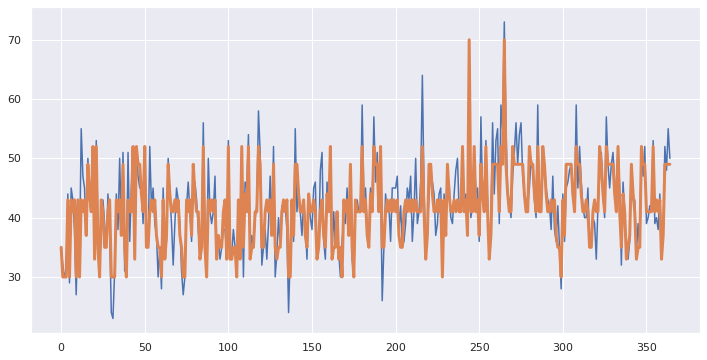

In [149]:
model = hmm.GaussianHMM(n_components=12,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)